In [1]:
from scipy.io import wavfile
import pyaudio
import matplotlib.pyplot as plt
from scipy.fftpack import fft ,fftfreq
import numpy as np

# reading the given Audios

In [2]:
samplerate, data = wavfile.read('audio1.wav')
samplerate1, data1 = wavfile.read('audio2.wav')

# get the duration of audios this can be also taken by writing data/samplerate

In [3]:
import librosa
length_of_audio1 = librosa.get_duration(filename='audio1.wav') # duration of the audio
length_of_audio2 = librosa.get_duration(filename='audio2.wav') # duration of the audio

# plotting the entire signal and showing the graph between 0.5 and 1s

Text(0.5, 1.0, 'magnitude of signal audio1 between 0.5s-1s')

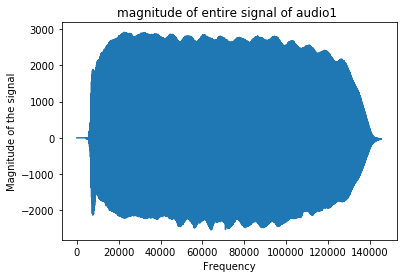

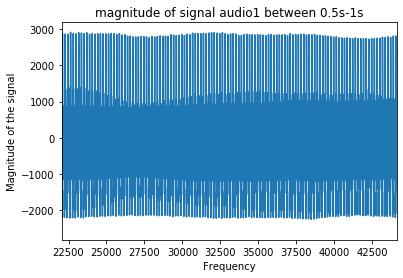

In [8]:
fig, ax = plt.subplots()
ax.plot(data)
ax.set_xlabel('Frequency' )
ax.set_ylabel('Magnitude of the signal')
plt.title("magnitude of entire signal of audio1 ")
p = pyaudio.PyAudio()
volume = 1.5
duration = length_of_audio1
stream = p.open(format=pyaudio.paFloat32,
        channels=1,
        rate=samplerate,
        output=True)
stream.write((volume*data).tobytes())
stream.stop_stream()
stream.close()
p.terminate()
# plotting the signal between 0.5 and 1s
fig, ax = plt.subplots()
ax.plot(data)
ax.set_xlabel('Frequency' )
ax.set_ylabel('Magnitude of the signal')
plt.xlim(np.ceil(len(data))*0.5/length_of_audio1, np.ceil(len(data))*1/length_of_audio1) # signal between 0.5s and 1s
plt.title("magnitude of signal audio1 between 0.5s-1s")

# this below script is used to define the number of samples we want to monitor 

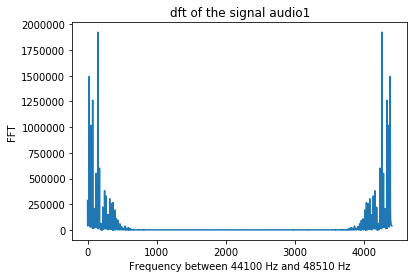

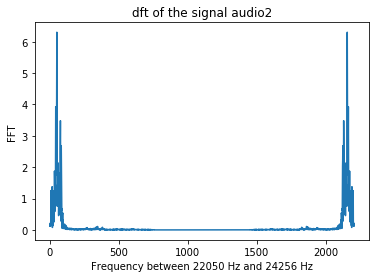

In [12]:
splitted_time = np.arange(1,1.2,0.1) # splitting time by 100ms interval(0.1s)

for i in range(0,len(splitted_time)-1):
    a = int(np.ceil(len(data)*splitted_time[i]/length_of_audio1)) # this fuction is used to define the number of samples in 0.1s
    b = int(np.ceil(len(data)*splitted_time[i+1]/length_of_audio1)) # for example if we want to change the interval by 0.2s then we do not
    e = int(np.ceil(len(data1)*splitted_time[i]/length_of_audio2))# need to change anything this function calculates it
    f = int(np.ceil(len(data1)*splitted_time[i+1]/length_of_audio2))
    extracted_data = data[a:b]
    extracted_data1 = data1[e:f]
    y = fft(extracted_data)
    y = np.abs(y)
    y1 = fft(extracted_data1)
    y1 = np.abs(y1)
    fig, ax = plt.subplots()
    ax.plot(y)
    ax.set_xlabel('Frequency between {} Hz and {} Hz'.format(a,b))
    ax.set_ylabel('FFT');
    # ax.plot(x,( y.real**2 + y.imag**2))
    plt.title("dft of the signal audio1")
    fig, ax = plt.subplots()
    ax.plot(y1)
    ax.set_xlabel('Frequency between {} Hz and {} Hz'.format(e,f))
    ax.set_ylabel('FFT');
    plt.title("dft of the signal audio2")
    plt.show()